In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
import requests

### Task 1:Data UnderStanding  & Cleaning 

In [2]:
loan_df = pd.read_csv('loan.csv',low_memory=False)

In [3]:
#Inspecting data Set 
loan_df.info()
loan_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#There are 111 columns and from above observation we can see large number of them of NULL/NA
#We would like to get rid of such columns
#Check for columns which have more than 80% of NA
df_clean = loan_df.loc[: ,loan_df.isnull().sum()/len(loan_df) < 0.8]

In [5]:
#Checking new dataframe after dropping columns which has all null values 
df_clean.shape

(39717, 55)

In [6]:
df_clean.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
#Checking for row with NA values more than 80 percent 
df_clean[df_clean.isnull().sum(axis=1)>55*0.8]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [8]:
# There are many columns with only a single unique value. Lets us drop
# all such columns as they will not be useful for EDA or visualisation
df_clean = df_clean.loc[:,df_clean.nunique()>1]

In [9]:
df_clean.shape

(39717, 46)

In [10]:
# Since there are still a large no. of variables,
# let us look at them 10 at a time to understand which ones may need cleaning or conversion

df_clean.iloc[:,0:9].info()
df_clean.iloc[:,0:9].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 9 columns):
id                 39717 non-null int64
member_id          39717 non-null int64
loan_amnt          39717 non-null int64
funded_amnt        39717 non-null int64
funded_amnt_inv    39717 non-null float64
term               39717 non-null object
int_rate           39717 non-null object
installment        39717 non-null float64
grade              39717 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 2.7+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B


In [11]:
#term and int_rate are of char format. converting it to number 
df_clean['term']=df_clean['term'].str.extract('(\d+)').astype(int)

In [12]:
df_clean['int_rate']=df_clean['int_rate'].str.extract('(\d+.\d+)').astype(float)

In [13]:
#Checking 10-20 column 
df_clean.iloc[:,10:19].info()
df_clean.iloc[:,10:19].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 9 columns):
emp_title              37258 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
url                    39717 non-null object
desc                   26777 non-null object
dtypes: float64(1), object(8)
memory usage: 2.7+ MB


,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc
0,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...
1,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...
2,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN
3,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...
4,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...


In [14]:
# Convert emp_length to numbers and issue_d to date

df_clean['emp_length']=df_clean['emp_length'].str.extract('(\d+)').astype(float)

In [15]:
#Impute emp_length NULL value with mean 
df_clean['emp_length'].fillna(df_clean.emp_length.mean(),inplace=True)

In [16]:
df_clean['issue_month']=df_clean['issue_d'].str.extract('(\w+)')
df_clean['issue_year']=df_clean['issue_d'].str.extract('(\d+)')
df_clean.drop(columns='issue_d',inplace=True)

In [17]:
#Checking unique value for emp_title , url and desc

df_clean[['emp_title','url','desc']].nunique()

emp_title    28820
url          39717
desc         26527
dtype: int64

In [18]:
# The variables emp_title,url and desc can also be dropped because:-
# 1) Too many unique character values
# 2) Should not have any logical bearing on the loan_status
df_clean = df_clean.drop(['url','desc','emp_title'],axis=1)

In [19]:
#Checking 20-30 column 
df_clean.iloc[:,20:29].info()
df_clean.iloc[:,20:29].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 9 columns):
delinq_2yrs               39717 non-null int64
earliest_cr_line          39717 non-null object
inq_last_6mths            39717 non-null int64
mths_since_last_delinq    14035 non-null float64
open_acc                  39717 non-null int64
pub_rec                   39717 non-null int64
revol_bal                 39717 non-null int64
revol_util                39667 non-null object
total_acc                 39717 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.7+ MB


,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,0,Jan-85,1,NaN,3,0,13648,83.70%,9
1,0,Apr-99,5,NaN,3,0,1687,9.40%,4
2,0,Nov-01,2,NaN,2,0,2956,98.50%,10
3,0,Feb-96,1,35.0,10,0,5598,21%,37
4,0,Jan-96,0,38.0,15,0,27783,53.90%,38


In [20]:
# Convert earliest_cr_line to date format
df_clean['earliest_cr_line_month']=df_clean['earliest_cr_line'].str.extract('(\w+)')
df_clean['earliest_cr_line_year']=df_clean['earliest_cr_line'].str.extract('(\d+)')
df_clean.drop(columns='earliest_cr_line',inplace=True)

In [21]:
#Replacing mths_since_last_delinq  with 0
df_clean['mths_since_last_delinq'].fillna(0,inplace=True)

In [22]:
#Converting revol_util to float
df_clean['revol_util']=df_clean['revol_util'].str.extract('(\d+.\d+)').astype(float)

In [23]:
#Checking 30-: column 
df_clean.iloc[:,30:].info()
df_clean.iloc[:,30:].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
total_pymnt                39717 non-null float64
total_pymnt_inv            39717 non-null float64
total_rec_prncp            39717 non-null float64
total_rec_int              39717 non-null float64
total_rec_late_fee         39717 non-null float64
recoveries                 39717 non-null float64
collection_recovery_fee    39717 non-null float64
last_pymnt_d               39646 non-null object
last_pymnt_amnt            39717 non-null float64
last_credit_pull_d         39715 non-null object
pub_rec_bankruptcies       39020 non-null float64
issue_month                39717 non-null object
issue_year                 39717 non-null object
earliest_cr_line_month     39717 non-null object
earliest_cr_line_year      39717 non-null object
dtypes: float64(9), object(6)
memory usage: 4.5+ MB


,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11,Jan,85
1,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,Apr,99
2,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11,Nov,01
3,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,Feb,96
4,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11,Jan,96


In [24]:
# Convert last_pymnt_d and last_credit_pull_d to dates
df_clean['last_pymnt_d_month']=df_clean['last_pymnt_d'].str.extract('(\w+)')
df_clean['last_pymnt_d_year']=df_clean['last_pymnt_d'].str.extract('(\d+)')
df_clean.drop(columns='last_pymnt_d',inplace=True)



In [25]:

df_clean['last_credit_pull_d_month']=df_clean['last_credit_pull_d'].str.extract('(\w+)')
df_clean['last_credit_pull_d_year']=df_clean['last_credit_pull_d'].str.extract('(\d+)')
df_clean.drop(columns='last_credit_pull_d',inplace=True)

In [26]:
df_clean.shape

(39717, 47)

In [27]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'last_pymnt_d_month',
       'last_pymnt_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year'],
      dtype='object')

In [28]:
df_clean.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,0.0,Dec,11,Jan,85,Jan,15,May,16
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,0.0,Dec,11,Apr,99,Apr,13,Sep,13
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,0.0,Dec,11,Nov,01,Jun,14,May,16
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,0.0,Dec,11,Feb,96,Jan,15,Apr,16
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,0.0,Dec,11,Jan,96,May,16,May,16


## Data analysis

In [29]:
## Buildup a data set which has only "Charged off Loans" and "Fully Paid" loans for analysis of
## closed loan instruments for understanding the trend

df_loan_closed = df_clean[df_clean['loan_status']!="Current"]

In [30]:
df_loan_closed.shape

(38577, 47)

In [31]:
df_clean.shape

(39717, 47)

In [32]:
df_clean.to_csv('output_shashank.csv')

### Some univariate & segmented univariate analysis

### total_rec_late_fee

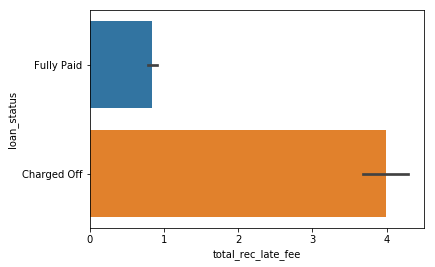

In [160]:
sns.barplot(x='total_rec_late_fee', y='loan_status', data=df_loan_closed)
plt.show()

## pub_rec_bankruptcies

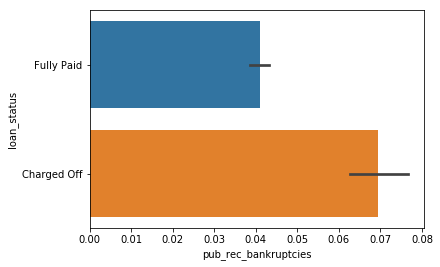

In [153]:
##total_rec_prncp are number which gives amount own by customer to bank which is 
##he paying in time.This is inversly proportional to charged off customers. 
##Charged off customers tend to miss it more.
sns.barplot(x='total_rec_prncp', y='loan_status', data=df_loan_closed)
plt.show()

In [ ]:
sns.barplot(x='pub_rec_bankruptcies', y='loan_status', data=df_loan_closed)
plt.show()

## revol_bal

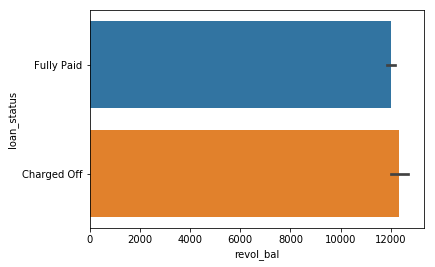

In [161]:
sns.barplot(x='revol_bal', y='loan_status', data=df_loan_closed)
plt.show()

## int_rate

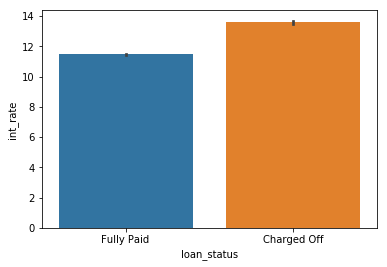

In [164]:
sns.barplot(x='loan_status',y='int_rate',data=df_loan_closed)

## Annual Income

In [33]:
# 1. Annual Income wise distribution 
# Note: Annual Income has high number of outliers.
#       Ignoring values which are > Q3 + 1.5(IQR)

Q1 = df_loan_closed['annual_inc'].quantile(0.25)
Q3 = df_loan_closed['annual_inc'].quantile(0.75)

IQR = Q3-Q1
 

In [34]:
df_loan_closed=df_loan_closed[df_loan_closed['annual_inc'] < (Q3 + 1.5 * IQR)]

In [35]:
df_loan_closed.shape

(36754, 47)

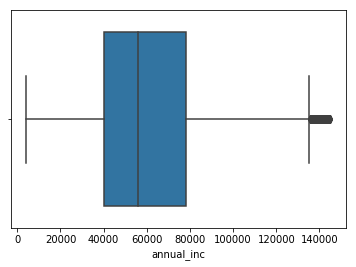

In [36]:
sns.boxplot(df_loan_closed.annual_inc)

In [37]:
#Segmenting annual income in low , medium and high 

df_loan_closed['annual_inc_range']=df_loan_closed['annual_inc']


In [38]:
df_loan_closed.loc[df_loan_closed['annual_inc']<=40000,['annual_inc_range']]='LIG'
df_loan_closed.loc[(df_loan_closed['annual_inc']>40000) & (df_loan_closed['annual_inc']<=80000) ,['annual_inc_range']]='MIG'
df_loan_closed.loc[df_loan_closed['annual_inc']>80000,['annual_inc_range']]='HIG'


In [59]:
df_loan_closed['loan_salary']=((df_loan_closed.loan_status +" "+  df_loan_closed.annual_inc_range))

In [60]:
pie_count=pd.DataFrame(df_loan_closed.groupby('loan_salary').loan_salary.count())

In [66]:
pie_count

,loan_salary
loan_salary,
Charged Off HIG,925
Charged Off LIG,1751
Charged Off MIG,2753
Fully Paid HIG,7247
Fully Paid LIG,7947
Fully Paid MIG,16131


([<matplotlib.patches.Wedge at 0x16565729470>,
 [Text(-0.83801,-0.712558,'Charged Off HIG'),
  Text(0.83801,0.712558,'Fully Paid HIG')],
 [Text(-0.457096,-0.388668,'11.3%'), Text(0.457096,0.388668,'88.7%')])

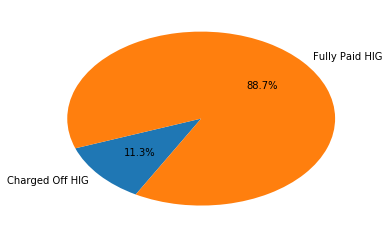

In [72]:
labels = 'Charged Off HIG', 'Fully Paid HIG',
sizes = [925, 7247]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

([<matplotlib.patches.Wedge at 0x16566f1a5f8>,
 [Text(-0.669645,-0.872683,'Charged Off LIG'),
  Text(0.669646,0.872683,'Fully Paid LIG')],
 [Text(-0.365261,-0.476009,'18.1%'), Text(0.365261,0.476009,'81.9%')])

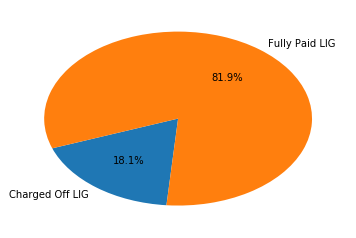

In [73]:
labels = 'Charged Off LIG', 'Fully Paid LIG',
sizes = [1751,7947]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

([<matplotlib.patches.Wedge at 0x1656540d7f0>,
 [Text(-0.760786,-0.794484,'Charged Off MIG'),
  Text(0.760786,0.794484,'Fully Paid MIG')],
 [Text(-0.414974,-0.433355,'14.6%'), Text(0.414974,0.433355,'85.4%')])

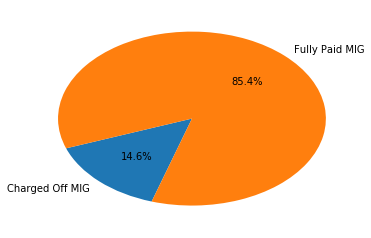

In [74]:
labels = 'Charged Off MIG', 'Fully Paid MIG'
sizes = [2753 , 16131]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

### loan_amaount analysis 

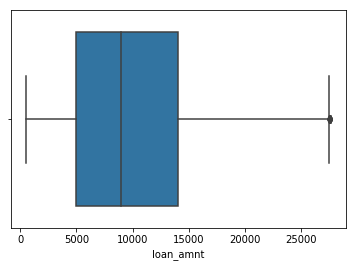

In [141]:
sns.boxplot(df_loan_closed.loan_amnt)

In [142]:
Q1 = df_loan_closed['loan_amnt'].quantile(0.25)
Q3 = df_loan_closed['loan_amnt'].quantile(0.75)

IQR = Q3-Q1

In [100]:
df_loan_closed=df_loan_closed[df_loan_closed['loan_amnt'] < (Q3 + 1.5 * IQR)]

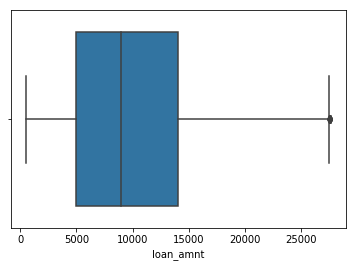

In [101]:
sns.boxplot(df_loan_closed.loan_amnt)

In [102]:
df_loan_closed['loan_amnt_range']=df_loan_closed['loan_amnt']

In [104]:
df_loan_closed.loc[df_loan_closed['loan_amnt']<=10000,['loan_amnt_range']]='Low'
#df_loan_closed.loc[(df_loan_closed['loan_amnt']>5000) & (df_loan_closed['loan_amnt']<=15000) ,['loan_amnt_range']]='Mid'
df_loan_closed.loc[df_loan_closed['loan_amnt']>10000,['loan_amnt_range']]='Hig'

In [106]:
df_loan_closed['amaount_status']=((df_loan_closed.loan_status +" "+  df_loan_closed.loan_amnt_range))

In [107]:
pie_count_loan_amount=pd.DataFrame(df_loan_closed.groupby('amaount_status').loan_salary.count())

In [108]:
pie_count_loan_amount

,loan_salary
amaount_status,
Charged Off Hig,2285
Charged Off Low,2909
Fully Paid Hig,11712
Fully Paid Low,18875


([<matplotlib.patches.Wedge at 0x165671c2e48>,
 [Text(-0.716072,-0.835009,'Charged Off Hig'),
  Text(0.716072,0.835009,'Fully Paid Hig')],
 [Text(-0.390585,-0.45546,'16.3%'), Text(0.390585,0.45546,'83.7%')])

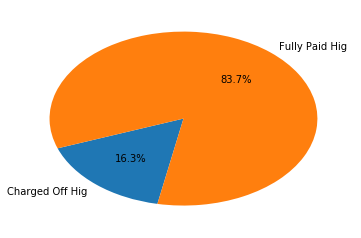

In [109]:
labels = 'Charged Off Hig', 'Fully Paid Hig',
sizes = [2285, 11712]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

([<matplotlib.patches.Wedge at 0x16566ff5f28>,
 [Text(-0.790781,-0.764634,'Charged Off Low'),
  Text(0.790781,0.764634,'Fully Paid Low')],
 [Text(-0.431335,-0.417073,'13.4%'), Text(0.431335,0.417073,'86.6%')])

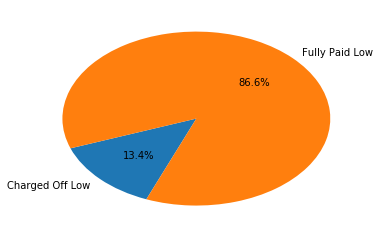

In [110]:
labels = 'Charged Off Low', 'Fully Paid Low',
sizes = [2909, 18875]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

### emp_length analysis 

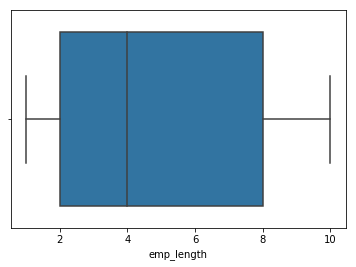

In [111]:
sns.boxplot(df_loan_closed.emp_length)

In [120]:
#No outlier 
df_loan_closed['emp_category']=df_loan_closed['emp_length']


In [134]:
df_loan_closed.loc[df_loan_closed['emp_length']<=5,['emp_category']]='Jr'
df_loan_closed.loc[(df_loan_closed['emp_length']>5) & (df_loan_closed['emp_length']<=9) ,['emp_category']]='Mid'
df_loan_closed.loc[df_loan_closed['emp_length']>9,['emp_category']]='Sr'

In [135]:
df_loan_closed['emp_category_status']=((df_loan_closed.loan_status +" "+  df_loan_closed.emp_category))

In [136]:
pie_count_emp_category=pd.DataFrame(df_loan_closed.groupby('emp_category_status').loan_salary.count())

In [137]:
pie_count_emp_category

,loan_salary
emp_category_status,
Charged Off Jr,2941
Charged Off Mid,1077
Charged Off Sr,1176
Fully Paid Jr,18250
Fully Paid Mid,5980
Fully Paid Sr,6357


([<matplotlib.patches.Wedge at 0x165672702e8>,
 [Text(-0.77807,-0.777564,'Charged Off Jr'),
  Text(0.778071,0.777564,'Fully Paid Jr')],
 [Text(-0.424402,-0.424126,'13.9%'), Text(0.424402,0.424126,'86.1%')])

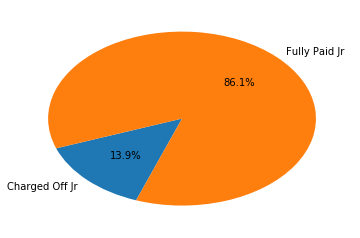

In [138]:
labels = 'Charged Off Jr', 'Fully Paid Jr',
sizes = [2941,  18250]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

([<matplotlib.patches.Wedge at 0x16567c8a4a8>,
 [Text(-0.743565,-0.810624,'Charged Off Mid'),
  Text(0.743565,0.810624,'Fully Paid Mid')],
 [Text(-0.405581,-0.442158,'15.3%'), Text(0.405581,0.442158,'84.7%')])

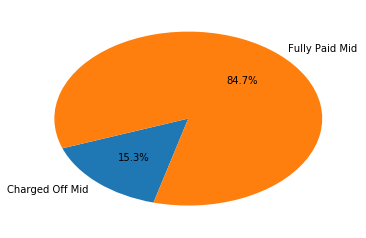

In [139]:
labels = 'Charged Off Mid', 'Fully Paid Mid',
sizes = [1077, 5980]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

([<matplotlib.patches.Wedge at 0x165675e2630>,
 [Text(-0.734611,-0.818747,'Charged Off Sr'),
  Text(0.734611,0.818747,'Fully Paid Sr')],
 [Text(-0.400697,-0.446589,'15.6%'), Text(0.400697,0.446589,'84.4%')])

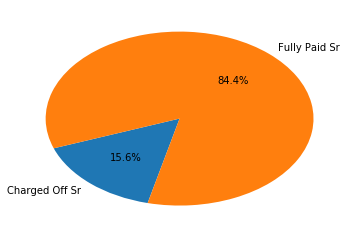

In [140]:
labels = 'Charged Off Sr', 'Fully Paid Sr',
sizes = [1176, 6357]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=200)

## Bivariant analysis 

In [143]:
corr = df_loan_closed.corr()

In [144]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

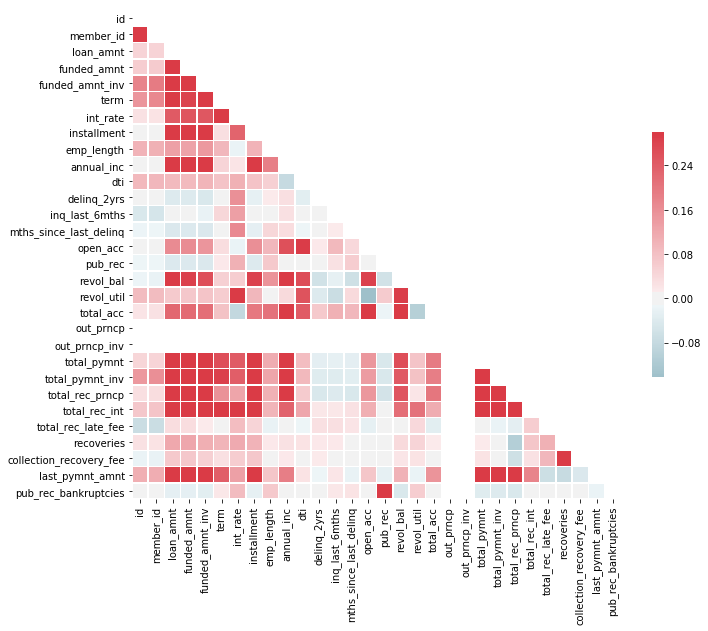

In [146]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [150]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [151]:
to_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'pub_rec_bankruptcies']

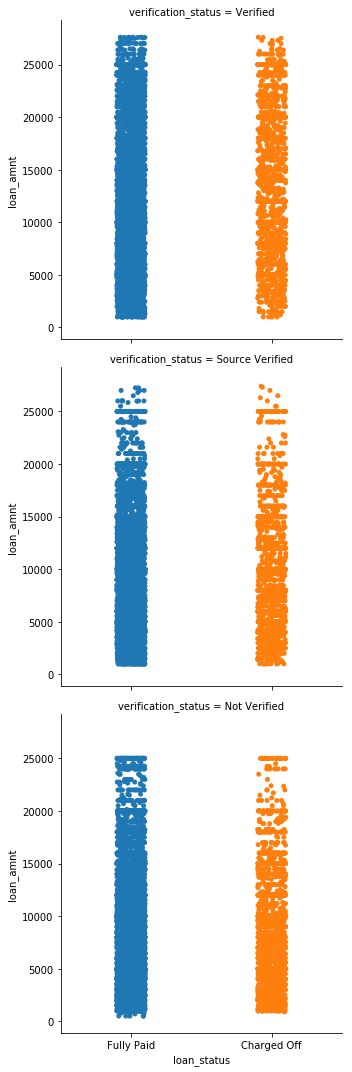

In [162]:
g = sns.catplot(y='loan_amnt',x='loan_status',row = 'verification_status',data=df_loan_closed)

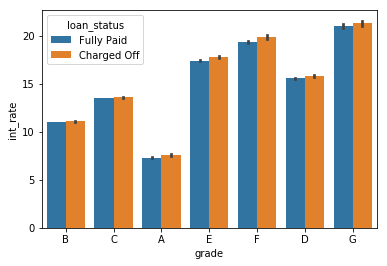

In [165]:
sns.barplot(x='grade',y='int_rate',hue='loan_status',data=df_loan_closed)